# 清理环境

In [77]:
rm(list=ls())
getwd()

[1] "/data/users/jiancheng.zhai/project/CVR/doc"

# 载入工具包

In [141]:
library(Amelia)
library(vcd)
library(corrgram)
library(hexbin)
library(RColorBrewer)
library(tabplot)

Loading required package: ffbase
Loading required package: ff
Loading required package: bit
Attaching package bit
package:bit (c) 2008-2012 Jens Oehlschlaegel (GPL-2)
creators: bit bitwhich
coercion: as.logical as.integer as.bit as.bitwhich which
operator: ! & | xor != ==
querying: print length any all min max range sum summary
bit access: length<- [ [<- [[ [[<-
for more help type ?bit

Attaching package: ‘bit’

The following object is masked from ‘package:base’:

    xor

Attaching package ff
- getOption("fftempdir")=="/tmp/RtmpA1EatP"

- getOption("ffextension")=="ff"

- getOption("ffdrop")==TRUE

- getOption("fffinonexit")==TRUE

- getOption("ffpagesize")==65536

- getOption("ffcaching")=="mmnoflush"  -- consider "ffeachflush" if your system stalls on large writes

- getOption("ffbatchbytes")==16777216 -- consider a different value for tuning your system

- getOption("ffmaxbytes")==536870912 -- consider a different value for tuning your system


Attaching package: ‘ff’

The followin

# 载入自定义工具包

In [230]:
lib.file <- "../lib/mylibs.R"
source(lib.file)

# 设置必要的参数

In [78]:
options(jupyter.plot_mimetypes = 'image/png')
options(scipen=200)

# 读入原始数据

In [193]:
cvr.file <- "../data/cvr_2015_12_08"
cvr.data <- read.file.func(cvr.file)


In [194]:
cvt.file <- "../data/cvt/2015-12-08"
cvt.data <- read.file.func(cvt.file)

clk.col.names.file <- "~/Utils/clk.log.colnames"
clk.col.names <- read.csv(file = clk.col.names.file, header = F, stringsAsFactors = F, sep = "\t")$V1
colnames(cvt.data) <- c(clk.col.names, "CVT")


In [195]:
cvt.data <- subset(cvt.data, select=c("ActionId", "CVT"))

In [196]:
colnames(cvr.data)[colnames(cvr.data)=="isCVT"] <- "Label"
cvr.data <- merge(cvr.data, cvt.data, by="ActionId", all.x=T, all.y=F)

# 统一数据中的缺失值为NA

In [197]:
cvr.data[cvr.data=='' & !is.na(cvr.data)] <- NA
cvr.data[cvr.data=="Na" & !is.na(cvr.data)] <- NA
cvr.data[cvr.data=="NA" & !is.na(cvr.data)] <- NA

# 查看数据

In [86]:
head(cvr.data)

,ActionId,ActionLogVersion,ActionType,ActionPlatform,ActionFirstId,ActionSessionId,ActionRequestTime,ActionResponseTime,ActionFirstTime,ActionPrevTime,ActionIsPing,ActionIsTest,ActionPlaceholder1,ActionPlaceholder2,ActionExtendData,UserId,UserTid,UserNew,UserPlaceholder1,UserExtendData,ActionUrl,AgentUrl,AgentAnonymousId,AgentReferUrl,AgentType,AgentUa,AgentCharset,AgentAppId,AgentCategories,AgentPlaceholder2,AgentPlaceholder3,AgentExtendData,GeoIp,GeoTimeOffsetMinutes,GeoId,GeoTid,GeoCell,GeoLl,GeoPlaceholder1,GeoPlaceholder2,GeoExtendData,DeviceType,DeviceOs,DeviceBrand,DeviceModel,DeviceCarrierName,DevicePlaceholder1,DevicePlaceholder2,DevicePlaceholder3,DeviceExtendData,IdAdvertiserId,IdOrderId,IdCampaignId,IdStrategyId,IdCreativeId,IdCreativeMapId,IdSCRelId,IdCreativeUnitId,IdCreativeUnitMapId,IdChannelId,IdPublisherId,IdVerticalId,IdAdUnitId,IdPlaceholder1,IdCompanyId,IdExtendData,AdUnitWidth,AdUnitHeight,AdUnitLocation,AdUnitViewType,AdUnitType,AdUnitFloorPrice,AdUnitPlaceholder1,AdUnitPlaceholder2,AdUnitExtendData,CreativeType,CreativePath,CreativeClickUrl,CreativePlaceholder1,CreativePlaceholder2,CreativeExtendData,BidAudienceDecisions,BidFamilyDecisions,BidPolicy,BidPolicyVersion,BidPolicyData,BidPlaceholder1,BidPlaceholder2,BidExtendData,PayType,PayBidPrice,PayWinPrice,PaySettPrice,PaySrvPrice,PayPlatformOffsetPrice,PayTaxPrice,PayPlaceholder1,PayPlaceholder2,PayExtendData,Label,CVT
1,FC800cDbsy6x,5,2,Optimus,14495039619251100,FC800cDbsU8d,20151208000039872,20151208000039872,20151207235921928,20151207235921928,0,0,NA,NA,NA,9daae518aa6dea25a4fdb683a63e10a9,9daae518aa6dea25a4fdb683a63e10a9,0,0,NA,/ifeng/click?p=rSjgbKsEWnA5.6OCSCDkSOycWDQbWtgLhQDL.i20HWn5.21dge5kyOeuvgQFmwFL_Gukp-9u4wI8CrYRL4ra1Iy2.21dge5kyOeuvgQFmwFL_Gukp-9u4wI8CrYRL4ra1Iy2.Tf.DQKYI3txQ.QA.6sbm.f.6YjrZDCRP62s.6hfYZAzS.s.L.i*W*I.CPdiODNO36l_kMqoJFjAQJSrovm90mBVUSj14pSi06nlhIzBihEM6Ak.W.6OL0VX.hn.D_.W.6gkR2JLSCv2f.GLs.wFK.UBn.Wnw.uD7C.gbGh.f.W.f.IsRshK.eSMgQkscMlKWDN5EwFprox5s.5F1RQup0Bx19Xg5s.QK.ubqJEYc.R6&s=nznDXxICMQ9GqT7H1MBxR0,NA,NA,NA,App,"Mozilla/5.0 (iPhone; CPU iPhone OS 9_1 like Mac OS X) AppleWebKit/601.1.46 (KHTML, like Gecko) Mobile/13B143",NA,395133418,1000,NA,NA,NA,61.171.145.46,480,79,NA,NA,"0,0",NA,NA,NA,Phone,IOS 9.1.0,NA,NA,0,0,0:2:narlGKpt6iWk_baDpj4QqQ,NA,NA,5473,22953,34925,160321,392292,NA,4158955,NA,NA,17,40,267,1526,Optimus,762,NA,580,280,FirstView,NA,Banner,0,NA,NA,NA,Img,NA,http://e.cn.miaozhen.com/r/k=2015688&p=6yn6x&ro=sm&dx=0&rt=2&ns=__IP__&ni=__IESID__&v=__LOC__&nd=__DRA__&np=__POS__&nn=__APP__&vo=3e0ec62cc&vr=2&o=http%3A%2F%2Fm.chevrolet.com.cn%2Fact%2Fbrand%2F2015promo%3Futm_source%3Difeng-MOB%26utm_medium%3DHS-201511070_INT32-55_HY201500047%26utm_content%3DSGMMRK2015000046%26utm_campaign%3DSP-MS1500110_HY201500047,NA,NA,NA,NA,NA,Auto,-2147254144,shaq_gm_v2#general,newrank#test,NA,NA,NA,416,0,0,0,0,0,0,0,NA,0,NA
2,FC801CDqceem_,5,2,Sina,acc2be1a-09b8-4e93-aeae-ff69d6192bcd,FC8015FDwY5r,20151208000112884,20151208000112888,20151208000105048,20151208000105048,0,0,NA,NA,NA,F5PNHI1iaccQ,vC8O/fVJPt0o29SpPOU9+w==,0,0,NA,/sinartb/click?p=rSBmQ_fEWCA5.D1TjZuTvOq2rDZm-ldzKUJRnMNqIYmb67KR3bxEtYy2thdxd.3322Wn5.tX2x1SsUtUm5wZT8eYSjok1jUv8z7ZCe.Vg1d1wFZOqNvgs5Q.df.CQBBZYFS.QA.W.kAdSQAcEdI1YFmC4JKnfM6mhFvj6wIm8vgBdoP.z.f.2.W.6O2mCAL-5UCy3Q2heOknGP.Ip.Iz.2OlUZrl-Oej.GLs.wFK.cBn.QHw.SP7C.8-Gh.z.n.kAdSQAcEd9l7gsz4uFSYN699-NCiYd56uDaC8Dk3YvcQ7Z2F7DboWe5X_v8GDMRyeSEwt6jhOpM4wZfW3SpzMadEac5RmTSHRY1fx3pvytTNsBaPHOFCpwFzAcSk_MSMTL9BPnTAq8z-FY26FzTMFnMENpmiSId8SPFmraMz-ZskxIxOySKLWD9kZud-DQb-iF8Il61xgpl8eqBWGmj_Xxn_oTxI7hF2xFS1NpmLsxM2KTfGW1SLVSnwiqsUOdSMiOpiZJzrPQp4Fss83gq3-vFhNZFn7YFf7mEL0vmZsTcD9Wu-7hRwV6KgTNNQPsMY5dLEPiFkdeCxDQBIegCnQkdQu8a6aoc6UgRPx3KIY6ae7IcqyY8u4A8UPZpJdmpc5JdJqvLvO45ltWseg08_QDk6gekpJQcPwYa3WySO9qS6KhNZnKTG4Asx6cRJTCnoHOfmZDnSq4ugDo2ItgCsQDBT.f.IsRshK.eSMgQkscMlKWDN5EwFprox5s.5F1RQup0Bx19Xg5s.QK.ubqJEYc.R6&s=Gk1CR7oHzcV5e51-uoep3P,http://sina.cn/?wm=3165_0003,NA,NA,Browser,"Mozilla/5.0 (Linux; U; Android 4.4.4; zh-cn; 

# 选取所需字段

In [198]:
cvr.data <- subset(cvr.data, select=c(
        "ActionPlatform",
        "ActionRequestTime",
        "ActionResponseTime",
        "UserId",
        "UserNew",
        "AgentUrl",
        "AgentType",
        "AgentAppId",
        "GeoIp",
        "GeoId",
        "GeoLl",
        "DeviceType",
        "DeviceOs",
        "IdAdvertiserId",
        "IdOrderId",
        "IdCampaignId",
        "IdStrategyId",
        "IdCreativeId",
        "IdPublisherId",
        "IdVerticalId",
        "IdAdUnitId",
        "IdPlaceholder1",
        "AdUnitWidth",
        "AdUnitHeight",
        "AdUnitType",
        "CreativeType",
        "BidPolicy",
        "PayBidPrice",
        "CVT",
        "Label"))
cvr.data[is.na(cvr.data$CVT), ]$CVT <- 0

In [130]:
head(cvr.data, n=50)

,ActionPlatform,ActionRequestTime,ActionResponseTime,UserId,UserNew,AgentUrl,AgentType,AgentAppId,GeoIp,GeoId,GeoLl,DeviceType,DeviceOs,IdAdvertiserId,IdOrderId,IdCampaignId,IdStrategyId,IdCreativeId,IdPublisherId,IdVerticalId,IdAdUnitId,IdPlaceholder1,AdUnitWidth,AdUnitHeight,AdUnitType,CreativeType,BidPolicy,PayBidPrice,CVT,Label,ClkDelyTime
1,Optimus,20151208185655136,20151208185655136,dd09b1919bf552824971220eafd284ca,0,NA,App,123,117.136.45.181,81,"0,0",Mobile,Android,5475,6420,28843,130089,382676,48,259,1467,Optimus,100,100,Banner,TopNews,Auto,0,0,0,0
2,Optimus,20151208145619108,20151208145619112,FC8EspBbcgN5,0,http://www.autohome.com.cn/?pvareaid=100514,Browser,NA,14.214.248.89,222,"0,0",General,WindowsXP,5475,6420,28841,130082,382480,42,93,403,Optimus,990,50,Banner,Swf,Auto,0,0,0,4
3,Optimus,20151208202546844,20151208202546848,FBCMMP8_yqr,0,http://www.autohome.com.cn/?pvareaid=100525,Browser,NA,218.86.7.253,131,"0,0",General,WindowsXP,5475,6420,28841,130082,382480,42,93,403,Optimus,990,50,Banner,Swf,Auto,0,0,0,4
4,Optimus,20151208131244688,20151208131244688,10f1ed6a845479605c91d4992a419c08,0,NA,App,123,106.43.144.241,299,"0,0",Mobile,Android,5475,6420,28843,130089,382676,48,259,1467,Optimus,100,100,Banner,TopNews,Auto,0,0,0,0
5,Optimus,20151208235420340,20151208235420344,8b68ee6a802b7608d00de7ccec89f898,0,NA,App,395133418,117.26.162.175,133,"0,0",Phone,IOS 9.0.2,5475,6420,28843,130100,382637,40,267,1526,Optimus,580,280,Banner,Img,Auto,416,0,0,4
6,Optimus,20151208132552580,20151208132552584,a5582e1144ac502dad57d82123c69515,0,NA,App,395133418,58.23.9.90,126,"0,0",Phone,IOS 9.0.2,5475,6420,28843,130100,382637,40,267,1526,Optimus,580,280,Banner,Img,Auto,416,0,0,4
7,Optimus,20151208162333532,20151208162333536,aae3753fb708fbab05f720a0f970b782,0,NA,App,com.ifeng.news2,101.127.94.153,394,"0,0",Phone,Android,5475,6420,28843,130100,382638,40,267,1526,Optimus,640,280,Banner,Img,Auto,416,0,0,4
8,Optimus,20151208173036320,20151208173036324,6dc472f9f237d4e62a9d42776fe3e32d,0,NA,App,123,117.136.8.232,79,"0,0",Mobile,IOS,5475,6420,28843,130089,382676,48,259,1467,Optimus,100,100,Banner,TopNews,Auto,0,0,0,4
9,Optimus,20151208232009808,20151208232009812,03f6bce308241e5117a459013969d8d0,0,NA,App,395133418,112.101.96.166,71,"0,0",Phone,IOS 7.1.2,5475,6420,28843,130100,382637,40,267,1526,Optimus,580,280,Banner,Img,Auto,416,0,0,4
10,Optimus,20151208132145248,20151208132145248,F9GBcPAYabJa,0,http://www.autohome.com.cn/,Browser,NA,122.224.98.20,95,"0,0",General,Windows7,5475,6420,28841,130082,382480,42,93,403,Optimus,990,50,Banner,Swf,Auto,0,0,0,0



 10000  49500  57600 162400 179200 204800 277500 673920 921600 
  1469    578     38    447    498  43853   1071      1    334 

# 添加字段

In [199]:
# ClkDelyTime 
cvr.data$ClkDelyTime <- cvr.data$ActionResponseTime - cvr.data$ActionRequestTime

In [200]:
# history CVR
orderid.list <- unique(cvr.data$IdOrderId)
res.list <- lapply(orderid.list, function(orderid){
    
        cvt.num <- sum(cvr.data[cvr.data$IdOrderId==orderid, ]$Label)
        clk.num <- nrow(cvr.data[cvr.data$IdOrderId==orderid, ])
        cvr <- cvt.num/clk.num    
        return(c(as.character(orderid), cvr))
    })
history.cvr <- do.call(rbind, res.list)


In [201]:
history.cvr <- as.data.frame(history.cvr, stringsAsFactors = F)
colnames(history.cvr) <- c("IdOrderId","HistoryCVR")
history.cvr$HistoryCVR <- as.numeric(history.cvr$HistoryCVR)
cvr.data <- merge(cvr.data, history.cvr, all.x=T, all.y=F, by="IdOrderId")



In [202]:
# Hour
cvr.data$Hour <- substr(cvr.data$ActionRequestTime, 9, 10)

In [ ]:
# area size
#cvr.data$AreaSize <- as.numeric(cvr.data)

# 数据变换

In [203]:
# 取domain
cvr.data$AgentUrl <- domain.name(cvr.data$AgentUrl)

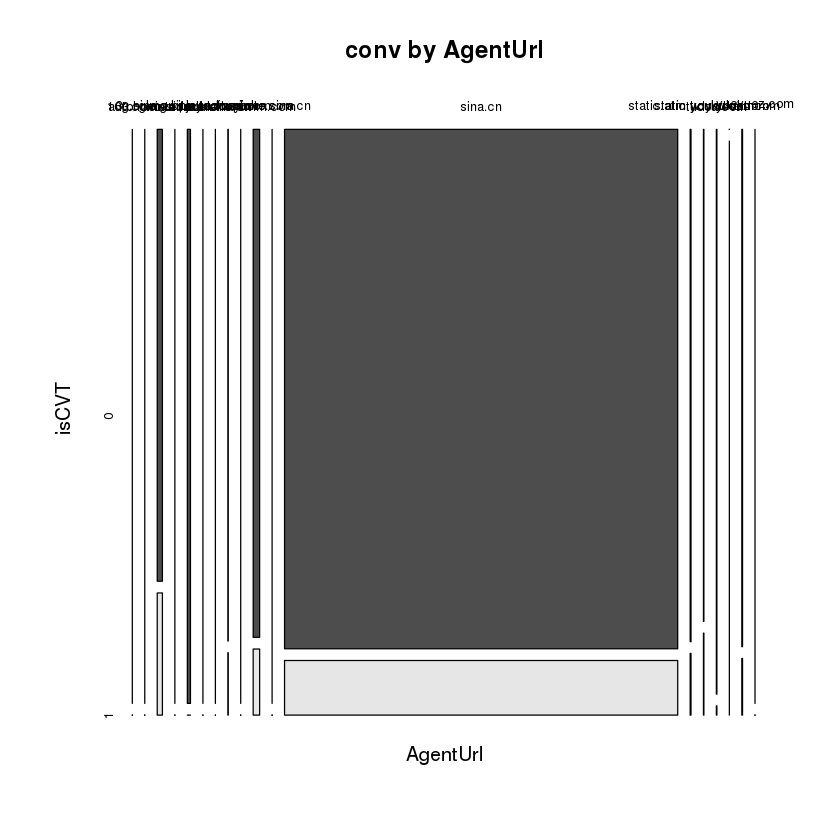

In [235]:
mosaicplot(cvr.data$AgentUrl ~ cvr.data$Label, 
           main="conv by AgentUrl", shade=FALSE, 
           color=TRUE, xlab="AgentUrl", ylab="isCVT")

In [206]:
# 规范DeviceOS
cvr.data$DeviceOs <- trim.deviceos(cvr.data$DeviceOs)

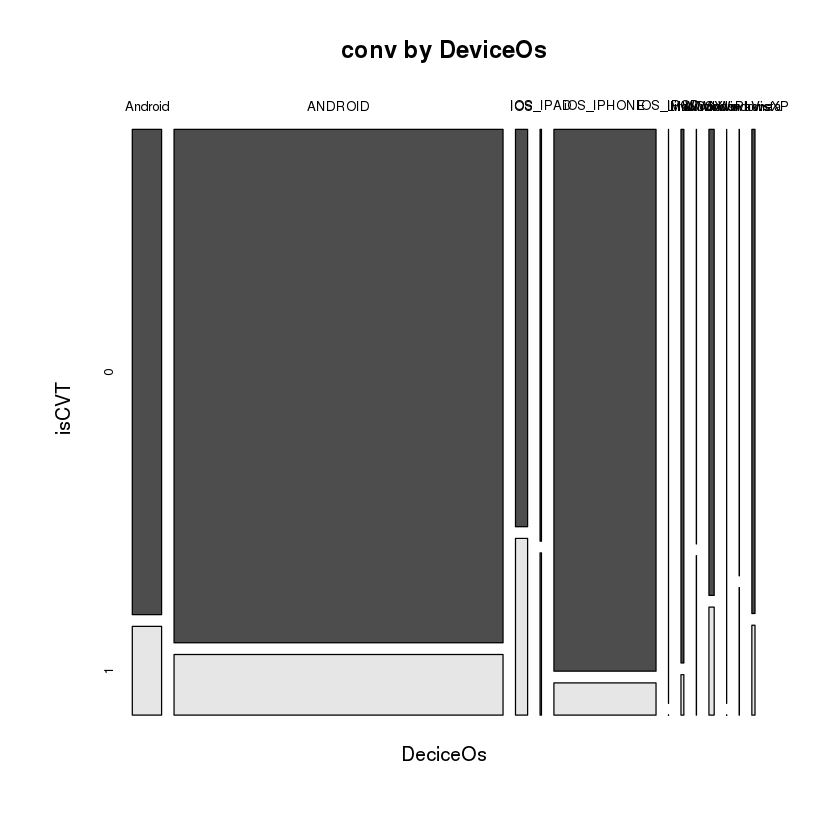

In [236]:
mosaicplot(cvr.data$DeviceOs ~ cvr.data$Label, 
           main="conv by DeviceOs", shade=FALSE, 
           color=TRUE, xlab="DeciceOs", ylab="isCVT")

In [232]:
# 转化IP地址信息
freegeoip(head(cvr.data$GeoIp))

Loading required package: rjson


,ip,country_code,country_name,region_code,region_name,city,zip_code,time_zone,latitude,longitude,metro_code
1,117.136.45.181,CN,China,32,Jiangsu Sheng,Nanjing,,Asia/Shanghai,32.0617,118.7778,0
2,14.214.248.89,CN,China,44,Guangdong,Guangzhou,,Asia/Shanghai,23.1167,113.25,0
3,218.86.7.253,CN,China,35,Fujian,Fuzhou,,Asia/Shanghai,26.0614,119.3061,0
4,106.43.144.241,CN,China,52,Guizhou Sheng,Guiyang,,Asia/Shanghai,26.5833,106.7167,0
5,117.26.162.175,CN,China,35,Fujian,Fuzhou,,Asia/Shanghai,26.0614,119.3061,0
6,58.23.9.90,CN,China,35,Fujian,Xiamen,,Asia/Shanghai,24.4798,118.0819,0


In [233]:
ip.list <- unique(cvr.data$GeoIp)
ip.data <- freegeoip(ip.list)

Warning message:
In file(con, "r"): 无法打开: HTTP状态是'503Service Unavailable'

ERROR: Error in file(con, "r"): 无法打开链结


# Missmap

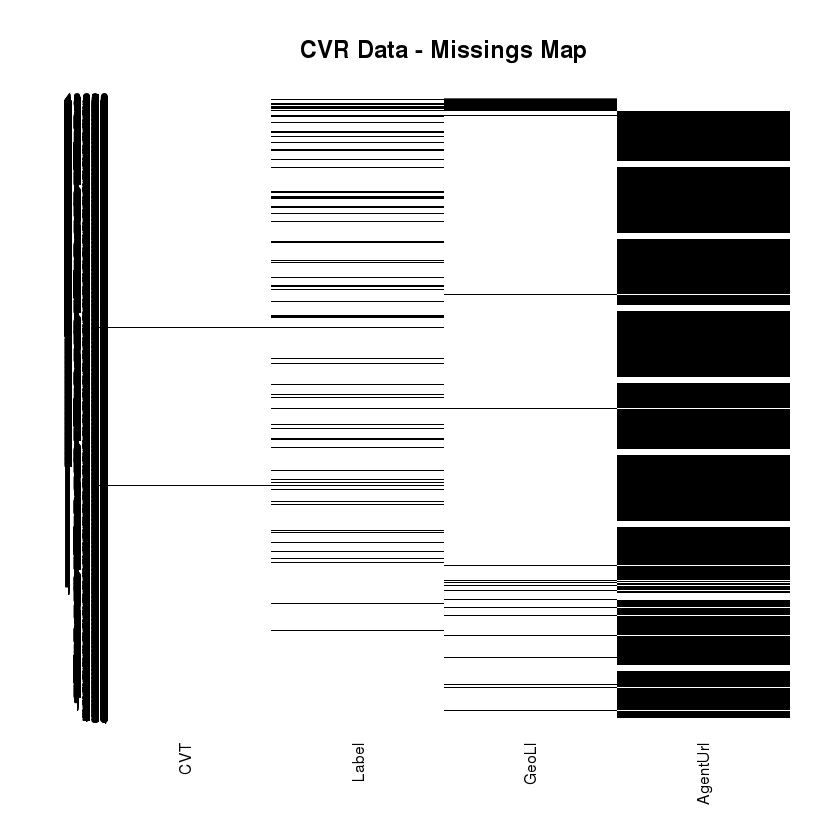

In [122]:
miss.data <- subset(cvr.data, select=c( "CVT", "Label","GeoLl", "AgentUrl"))
miss.data[miss.data$CVT==0, ]$CVT <- NA
miss.data[miss.data$Label==0,]$Label <- NA
missmap(miss.data, main="CVR Data - Missings Map", 
        col=c("white", "black"), legend=FALSE, rank.order=F)

# Tabplot

Warning message:
In grid.Call(L_convert, x, as.integer(whatfrom), as.integer(whatto), : 字符0x9不带字体宽度这样的设置

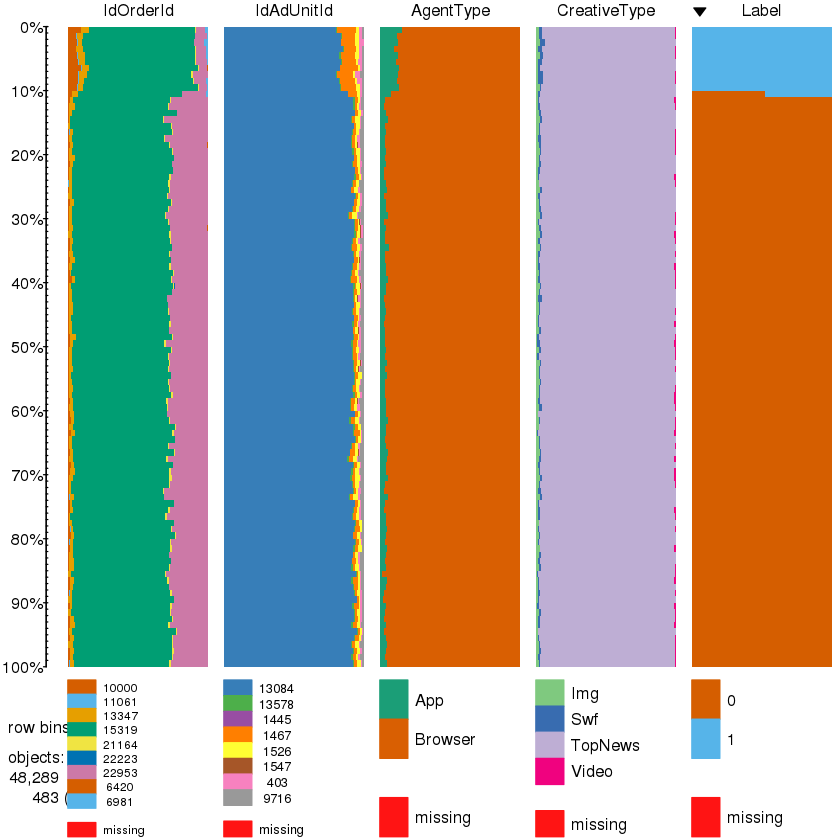

In [160]:
tabplot.data <- subset(cvr.data, select=c("IdOrderId", 
                           "IdAdUnitId",
                           "AgentType",
                            "AgentUrl",
                           "CreativeType",
                           "Label"))
tabplot.data <- as.matrix(tabplot.data)
tabplot.data <- as.data.frame(tabplot.data, stringsAsFactors=T)


tableplot(tabplot.data,
        sortCol=Label)

#help(tableplot)


#  barplot

In [222]:
attach(cvr.data)

The following objects are masked from cvr.data (pos = 9):

    ActionPlatform, ActionRequestTime, ActionResponseTime,
    AdUnitHeight, AdUnitType, AdUnitWidth, AgentAppId, AgentType,
    AgentUrl, BidPolicy, ClkDelyTime, CreativeType, CVT, DeviceOs,
    DeviceType, GeoId, GeoIp, GeoLl, IdAdUnitId, IdAdvertiserId,
    IdCampaignId, IdCreativeId, IdOrderId, IdPlaceholder1,
    IdPublisherId, IdStrategyId, IdVerticalId, Label, PayBidPrice,
    UserId, UserNew

The following objects are masked from cvr.data (pos = 10):

    ActionPlatform, ActionRequestTime, ActionResponseTime,
    AdUnitHeight, AdUnitType, AdUnitWidth, AgentAppId, AgentType,
    AgentUrl, BidPolicy, CreativeType, CVT, DeviceOs, DeviceType,
    GeoId, GeoIp, GeoLl, IdAdUnitId, IdAdvertiserId, IdCampaignId,
    IdCreativeId, IdOrderId, IdPlaceholder1, IdPublisherId,
    IdStrategyId, IdVerticalId, Label, PayBidPrice, UserId, UserNew

The following objects are masked from cvr.data (pos = 11):

    ActionPlatform, ActionRequ

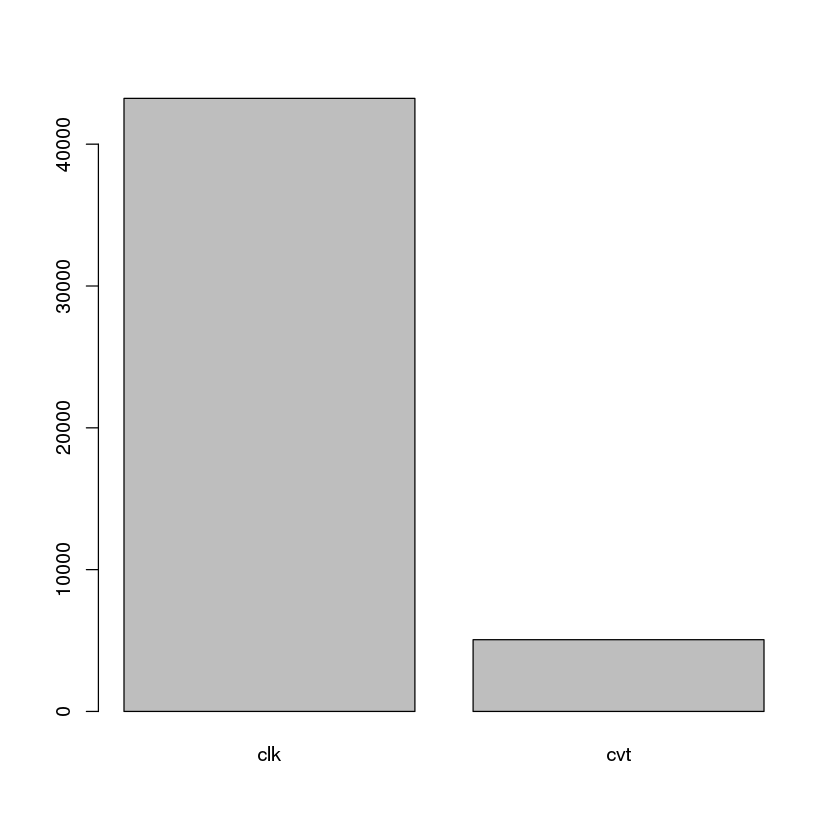

In [90]:
barplot(table(Label), 
        names.arg=c("clk", "cvt"))


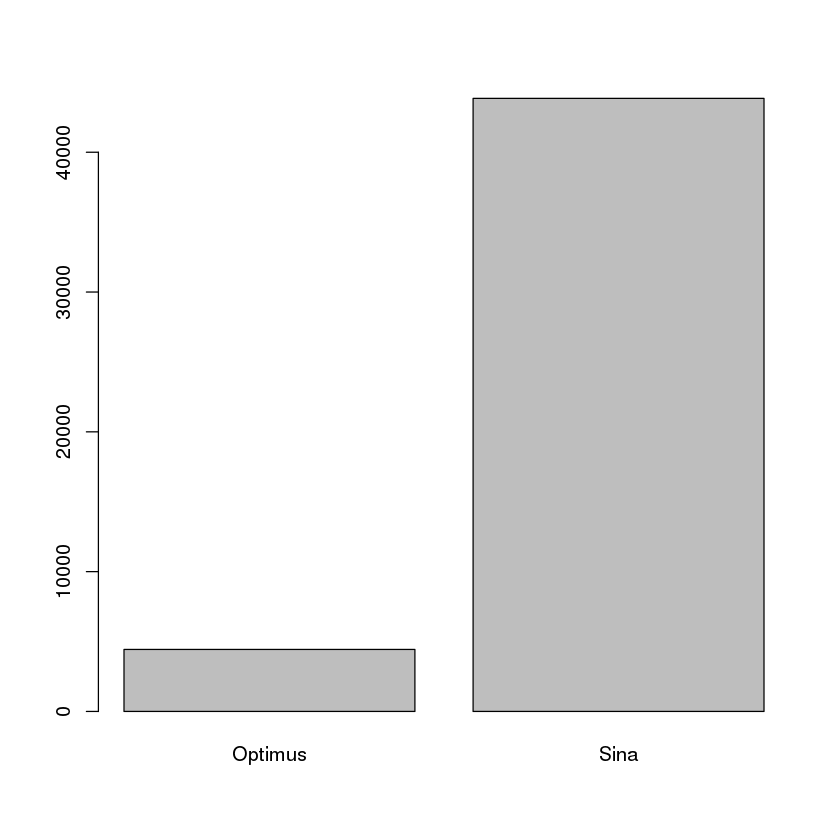

In [16]:
barplot(table(ActionPlatform))

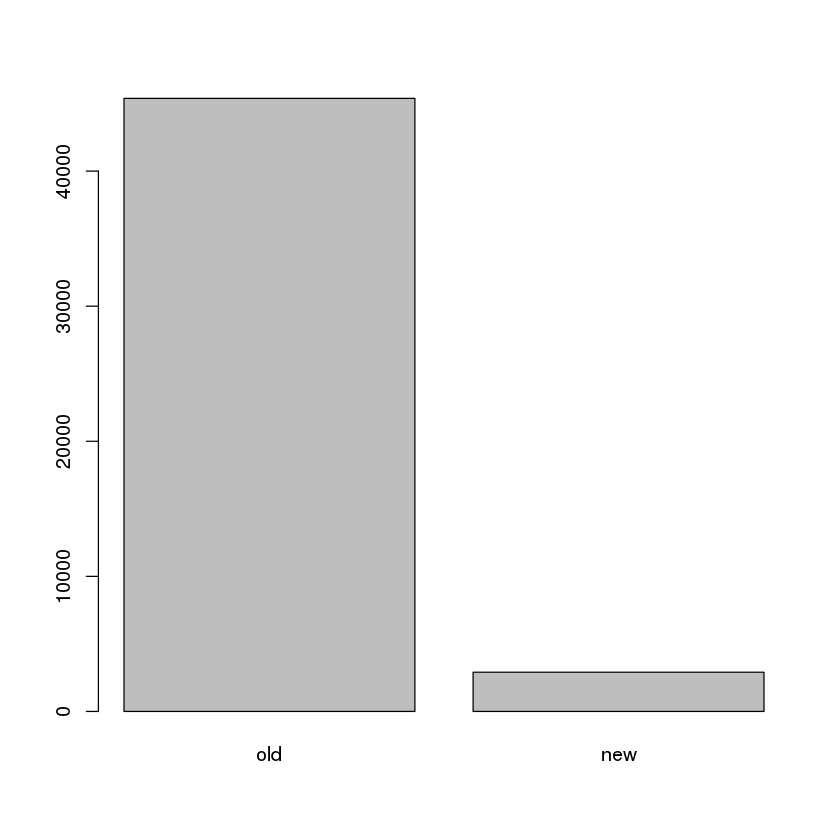

In [18]:
barplot(table(UserNew),
       names.arg=c("old", "new"))

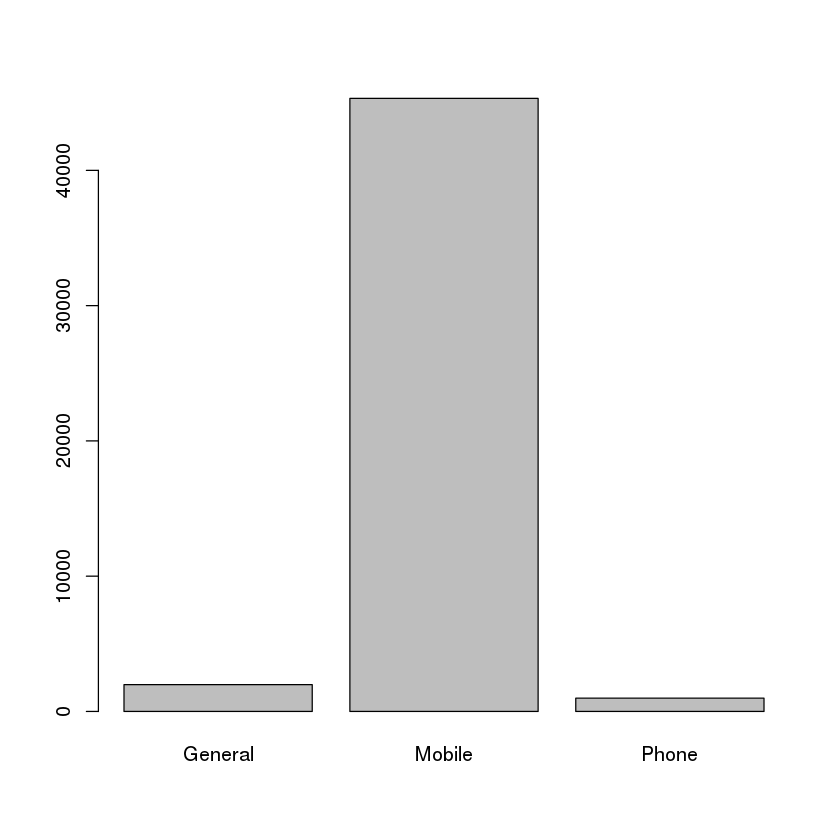

In [25]:
barplot(table(DeviceType))

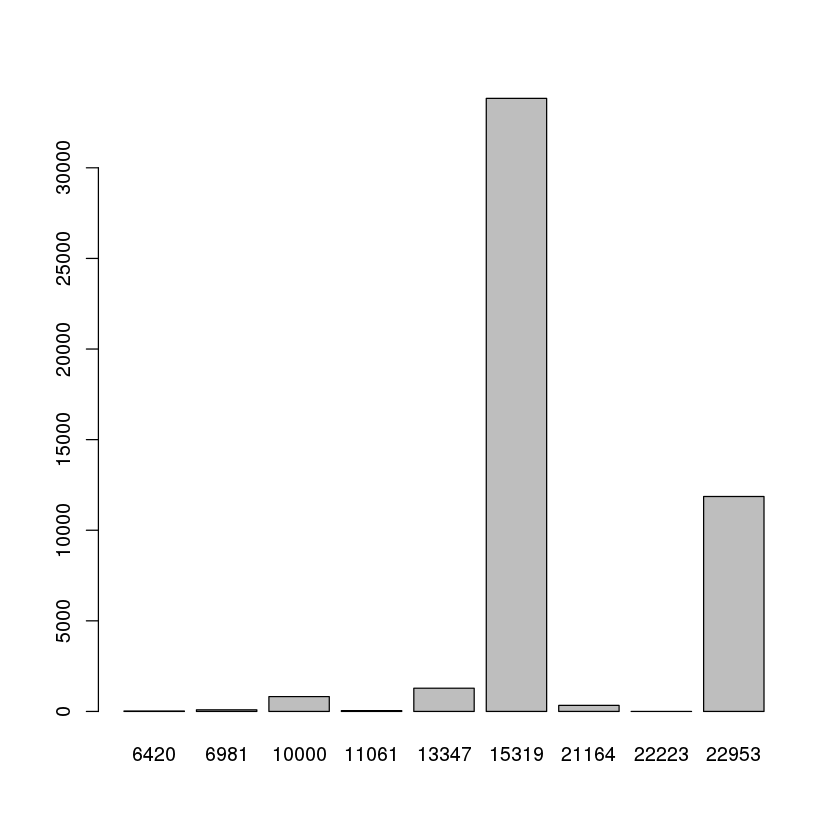

In [27]:
barplot(table(IdOrderId))

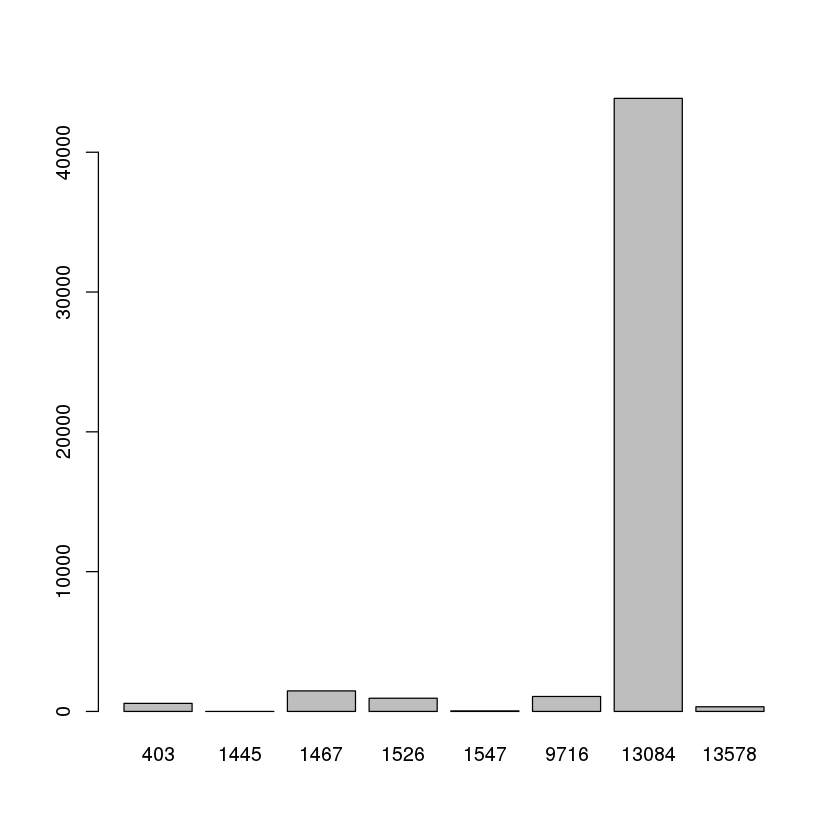

In [28]:
barplot(table(IdAdUnitId))

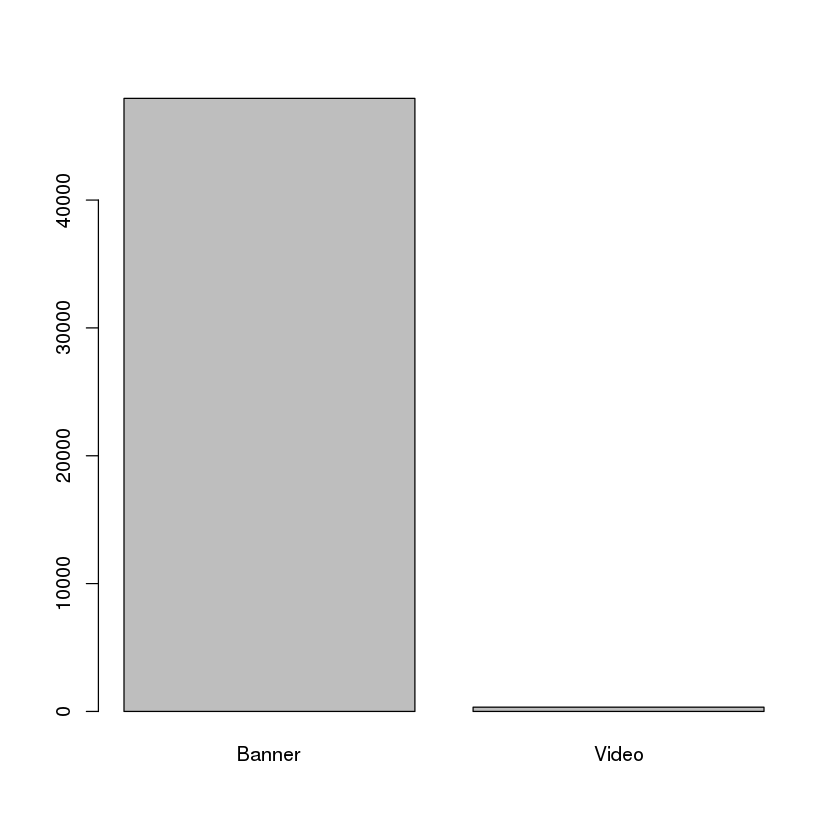

In [29]:
barplot(table(AdUnitType))

In [30]:
cvr.data[AdUnitType=="Video",]

,ActionId,ActionLogVersion,ActionType,ActionPlatform,ActionFirstId,ActionSessionId,ActionRequestTime,ActionResponseTime,ActionFirstTime,ActionPrevTime,ActionIsPing,ActionIsTest,ActionPlaceholder1,ActionPlaceholder2,ActionExtendData,UserId,UserTid,UserNew,UserPlaceholder1,UserExtendData,ActionUrl,AgentUrl,AgentAnonymousId,AgentReferUrl,AgentType,AgentUa,AgentCharset,AgentAppId,AgentCategories,AgentPlaceholder2,AgentPlaceholder3,AgentExtendData,GeoIp,GeoTimeOffsetMinutes,GeoId,GeoTid,GeoCell,GeoLl,GeoPlaceholder1,GeoPlaceholder2,GeoExtendData,DeviceType,DeviceOs,DeviceBrand,DeviceModel,DeviceCarrierName,DevicePlaceholder1,DevicePlaceholder2,DevicePlaceholder3,DeviceExtendData,IdAdvertiserId,IdOrderId,IdCampaignId,IdStrategyId,IdCreativeId,IdCreativeMapId,IdSCRelId,IdCreativeUnitId,IdCreativeUnitMapId,IdChannelId,IdPublisherId,IdVerticalId,IdAdUnitId,IdPlaceholder1,IdCompanyId,IdExtendData,AdUnitWidth,AdUnitHeight,AdUnitLocation,AdUnitViewType,AdUnitType,AdUnitFloorPrice,AdUnitPlaceholder1,AdUnitPlaceholder2,AdUnitExtendData,CreativeType,CreativePath,CreativeClickUrl,CreativePlaceholder1,CreativePlaceholder2,CreativeExtendData,BidAudienceDecisions,BidFamilyDecisions,BidPolicy,BidPolicyVersion,BidPolicyData,BidPlaceholder1,BidPlaceholder2,BidExtendData,PayType,PayBidPrice,PayWinPrice,PaySettPrice,PaySrvPrice,PayPlatformOffsetPrice,PayTaxPrice,PayPlaceholder1,PayPlaceholder2,PayExtendData,isCVT
172,FC8BId4bcbgp6,5,2,Optimus,FC8BII9ear7CW,FC8BIC0FchKr8,20151208111840296,20151208111840296,20151208111818616,20151208111818616,0,0,NA,NA,NA,FC8BIC0Fchgi,,0,0,NA,/youku/vast/click?p=rKBmQ_sEsCA5.VX2xOwuZLqqvJouCXW.7v2wsn5.3h.hX8kd4-7Z.QA.W.kAdSQAcEdIB7aMphaAjWvpdhMZmRrd924dq64aM9x8xr7-MwhA5W23kupH8rpTSFtKSNdxq7M98AaQC4tmz6GK2nMyliYsE1UKuhoJ9AENRQrImOyOLw6pf.z.W.f.f.6O2rVrj.IP.Z6.W.6OfYVKcyPxby34.MLs.vpK.yvi.QsF.Vz7V.aLOh.f.QWfs.s.kAdSQAcEdINEwdl4uMpENSThbNqnRs9hxs5z95kLhpFLxIEqyh8jWDztOyc-3YloLd50qrxRM5MNaZf93r5KMJl4mIjDmC5JYjqfUpqZS8Fn8Wsff_sCpFTUK2SkTWxf1E8wquLhq8KTQ-dcFsuWoDpEN25aoC58wK5VmRMzr8uxsBaPpgF5VyKFz5Ea3Y5EpFTgtpumMTTc1m58uMpENSdroZuh7sb2oEmESw5IYys1hhstAFCB.W.IsnMhK.VFFxt5L.5F1RQup0Bx19Xg5s.QK.ubqJEYc.R6&s=Uf7apMevkOhnxv34MaduIX,http://v.youku.com/v_show/id_XMTM4MzQzNjI4MA==.html?from=y1.6-97.3.1.bf86ba06a8d511e296ac,NA,,Browser,"Mozilla/5.0 (Windows NT 6.2; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/45.0.2454.93 Safari/537.36",NA,,NA,Chrome,NA,NA,124.173.80.22,480,217,NA,NA,,NA,NA,NA,General,Windows8,NA,NA,NA,NA,,NA,NA,5475,21164,31484,151712,337258,,3895633,NA,NA,17,57,1014,13578,Optimus,762,NA,1280,720,FirstView,Na,Video,0,NA,NA,NA,Video,NA,http://yktd.m.cn.miaozhen.com/r/k=2013364&p=6wx1Y&ro=sm&dx=0&rt=2&ns=__IP__&ni=__IESID__&v=__LOC__&nd=__DRA__&np=__POS__&nn=__APP__&o=http://www.cadillac.com.cn/active/ATSLMY16launch/,NA,NA,NA,NA,NA,Fixed,-2139062144,Fixed,newrank#test,NA,NA,NA,416,0,0,0,0,0,0,0,NA,0
228,FC8JkS0qw8Qc,5,2,Optimus,FC8Jju2eaq40m,FC8IfF3_cgNWm,20151208194728052,20151208194728056,20151208194657168,20151208194657168,0,0,NA,NA,NA,FC5CQ447cg0c,,0,0,NA,/youku/vast/click?p=rKBmQ_sEsCA5.VX2xLuNyONqvJQl9uG.VGwt_p5.3h.hX8k1SLzO3.QA.W.kAdSQAcEdI19ggqrJspY-5n_EN1ZEObHr1qZN5ppW9ckzsmVxJpM6p55scCUd-MHPz93DipZ3HTNQmM4w1F_Uvl_YZSWuOmVxg1pWvS1-ySv0IS07hx72KNQO9qwkdxYpFTbq1k73oNRwMxh3g53-x5n05c2UhRhvPbOoAz1-ybGzNfBWY2XISnw_q8.h.W.s.f.6O2rVrj.IP.Z6.W.6OfYVKcyPxby34.MLs.vpK.yvi.5sF.4_7V.aLOh.f.QWfs.s.kAdSQAcEdINEwdl4uMpENSThbNqnRs9hxs5z95kLhpFLxIEqyh8jWDztOyc-3YloLd50qrxRM5MNaZf93r5KMJl4mIjDmC5JYjqfUpqZS8Fn8Wsff_sCpFTUK2SkTWxf1E8wquLhq8KTQ-dcFsuWoDpEN25aoC58wK5VmRMzr8uxsBaPpgF5VyKFz5Ea3Y5EpFTgtpumMTTc1m58uMpENSdroZuh7sb2oEmESw5IYys1hhstAFCB.W.IsnMhK.VFFxt5L.5F1RQup0Bx19Xg5s.QK.ubqJEYc.R6&s=IZBXLM35MXELu-9evNV1C_,http://static.atm.youku.com/idea/iab/vpaid/V2_INT_VPAIDAdRenderer.swf?url=http%3A%2F%2Fi.ipinyou.com%2Fyouku%2Fvast%3Fw%3D1280%26h%3D720%26a,NA,,Browser,Mozilla/4.0 (compatible; MSIE 7.0; Windows NT 6.1; WOW64; Trident/4.0; SLCC2; .NET CLR 2.0.50727; .NET CLR 3.5.30729; .NET CLR 3.0.30729; Media Center PC 6.0

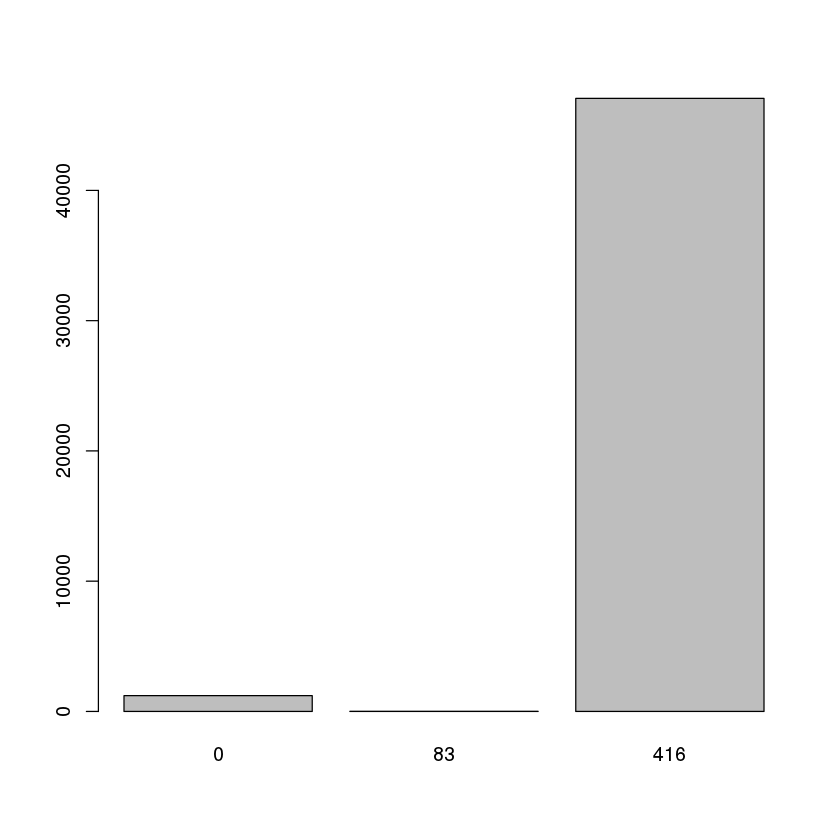

In [31]:
barplot(table(PayBidPrice))

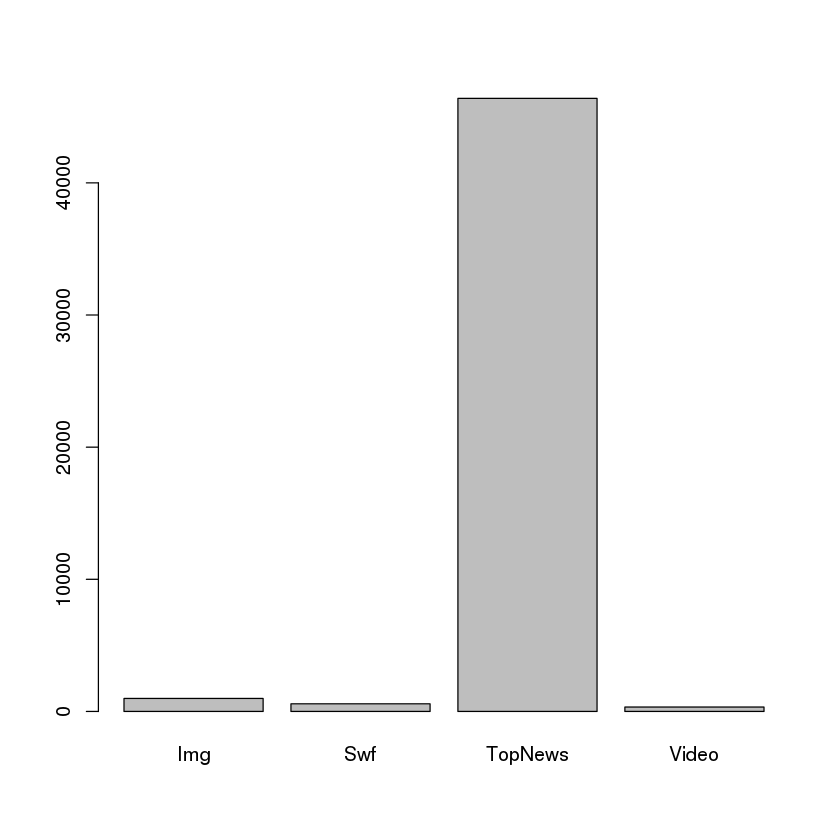

In [32]:
barplot(table(CreativeType))

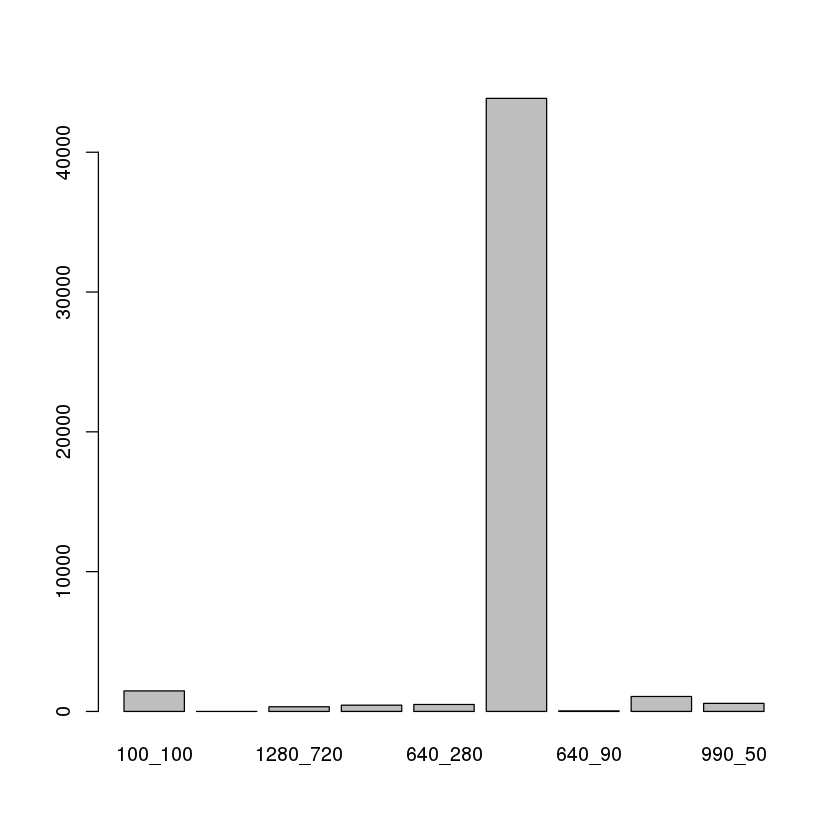

In [39]:
barplot(table(paste0(AdUnitWidth, "_", AdUnitHeight)))

#  mosaicplot 

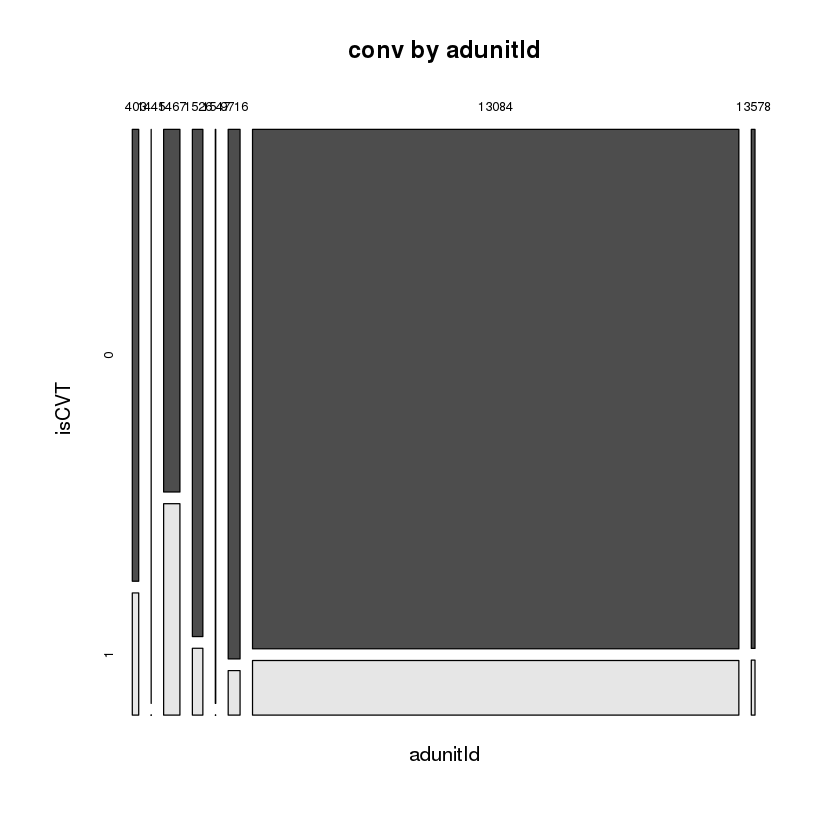

In [104]:
mosaicplot(IdAdUnitId ~ Label, 
           main="conv by adunitId", shade=FALSE, 
           color=TRUE, xlab="adunitId", ylab="isCVT")

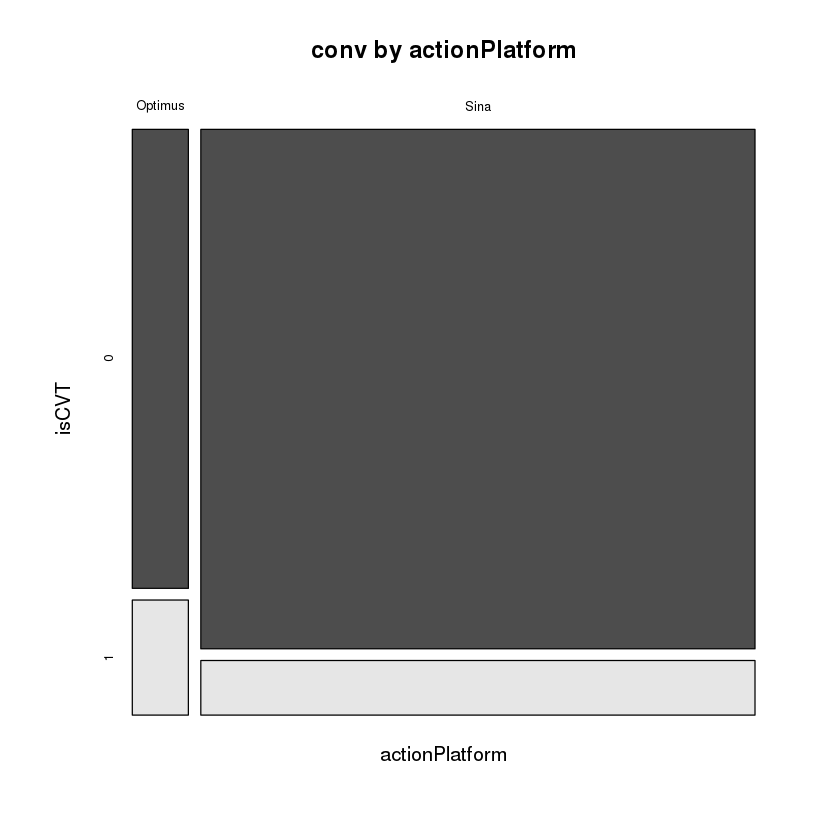

In [105]:
mosaicplot(ActionPlatform ~ Label, 
           main="conv by actionPlatform", shade=FALSE, 
           color=TRUE, xlab="actionPlatform", ylab="isCVT")

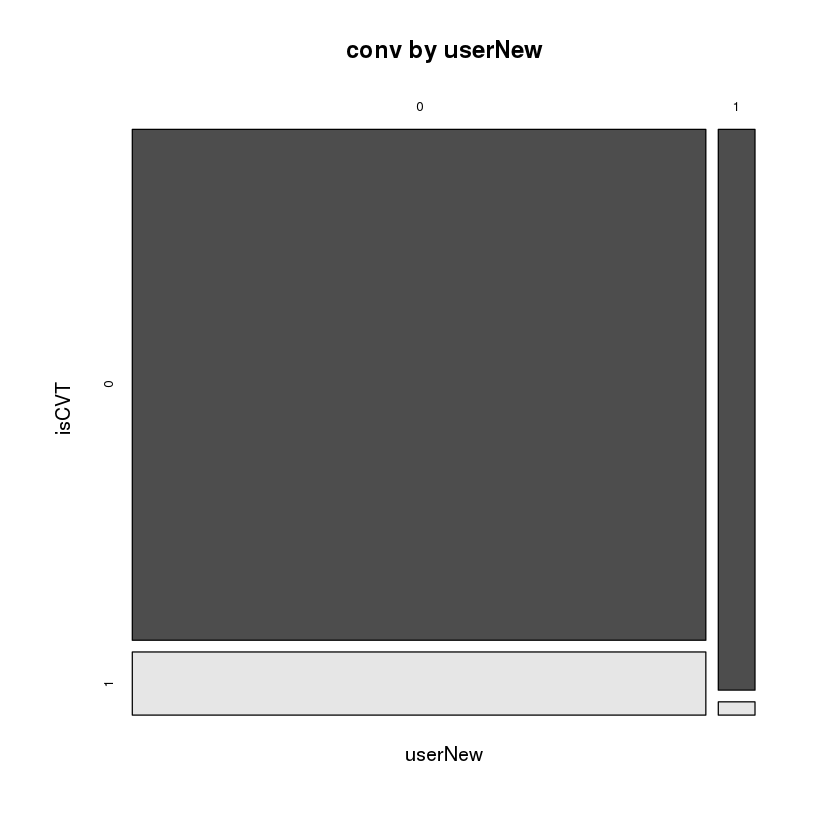

In [107]:
mosaicplot(UserNew ~ Label, 
           main="conv by userNew", shade=FALSE, 
           color=TRUE, xlab="userNew", ylab="isCVT")

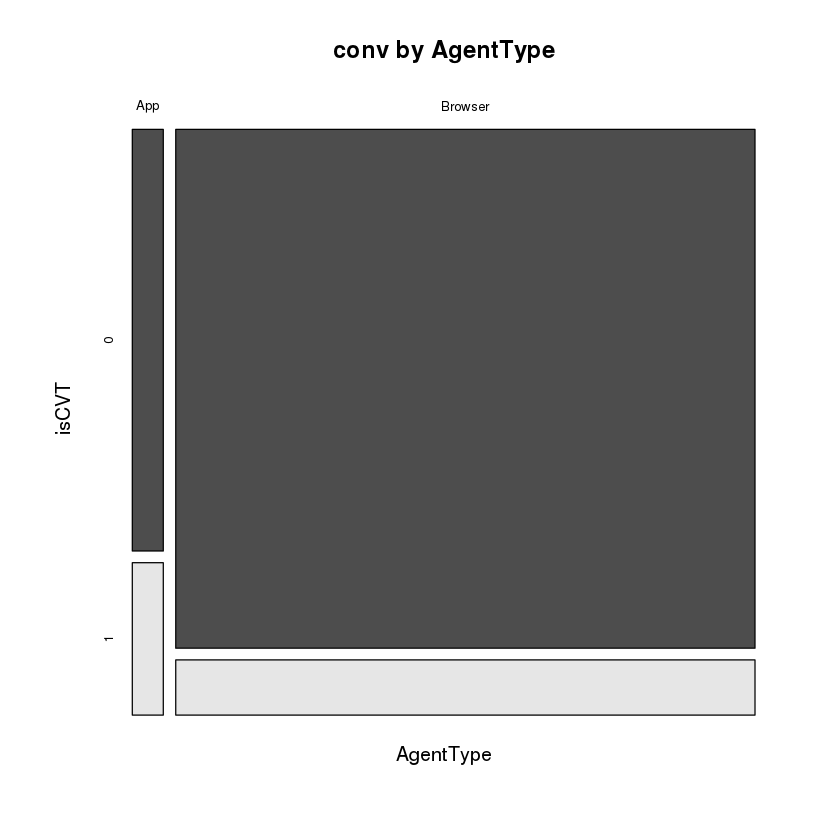

In [109]:
mosaicplot(AgentType ~ Label, 
           main="conv by AgentType", shade=FALSE, 
           color=TRUE, xlab="AgentType", ylab="isCVT")

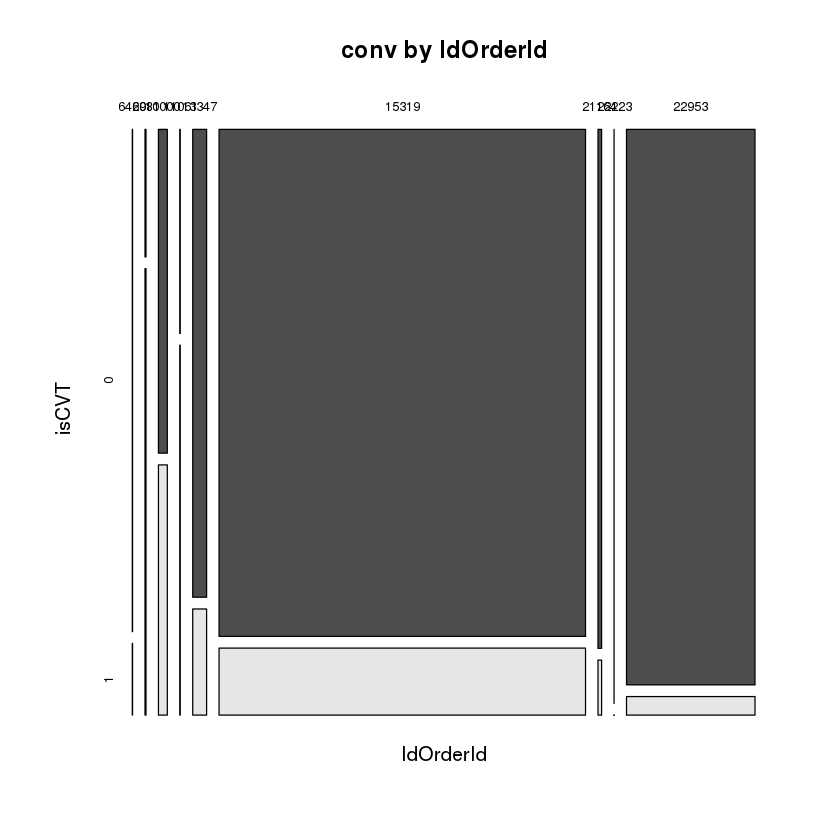

In [113]:
mosaicplot(IdOrderId ~ Label, 
           main="conv by IdOrderId", shade=FALSE, 
           color=TRUE, xlab="IdOrderId", ylab="isCVT")

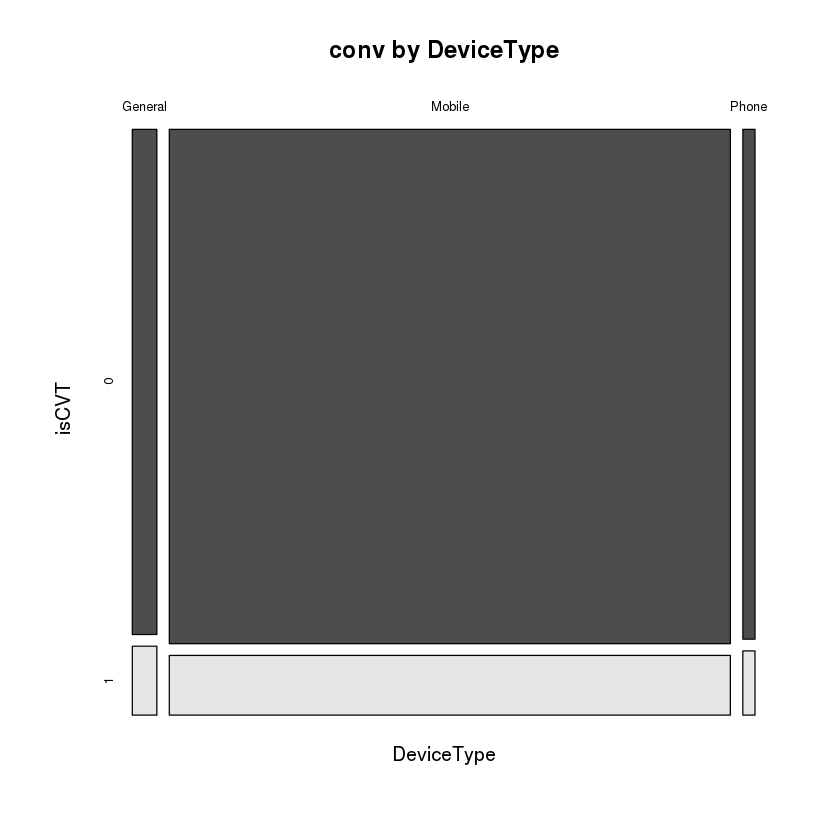

In [114]:
mosaicplot(DeviceType ~ Label, 
           main="conv by DeviceType", shade=FALSE, 
           color=TRUE, xlab="DeviceType", ylab="isCVT")

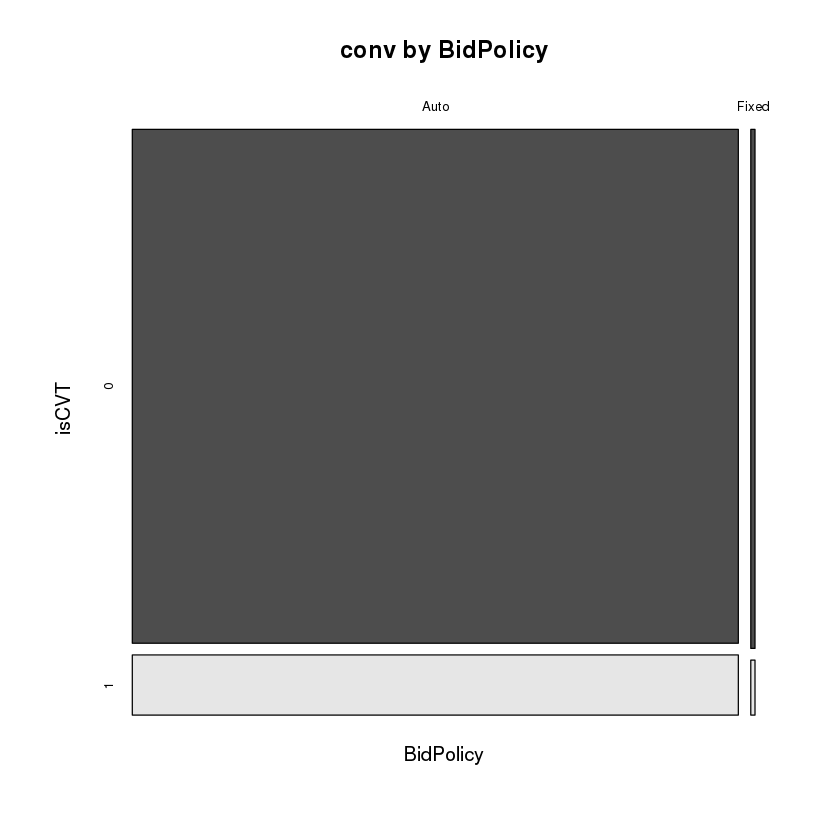

In [115]:
mosaicplot(BidPolicy ~ Label, 
           main="conv by BidPolicy", shade=FALSE, 
           color=TRUE, xlab="BidPolicy", ylab="isCVT")

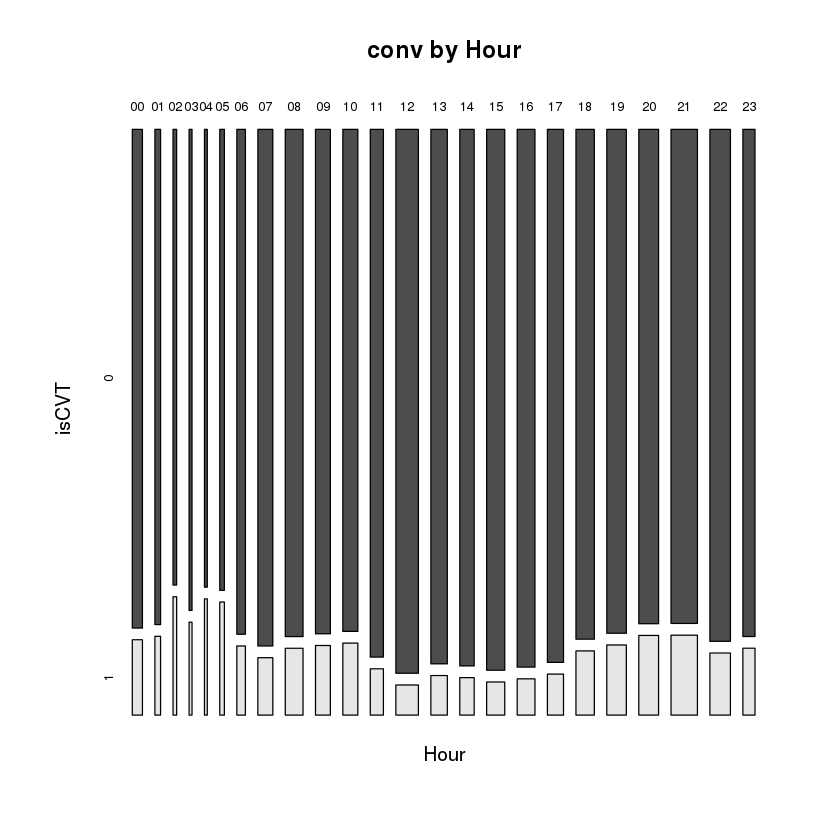

In [35]:
mosaicplot(Hour ~ Label, 
           main="conv by Hour", shade=FALSE, 
           color=TRUE, xlab="Hour", ylab="isCVT")

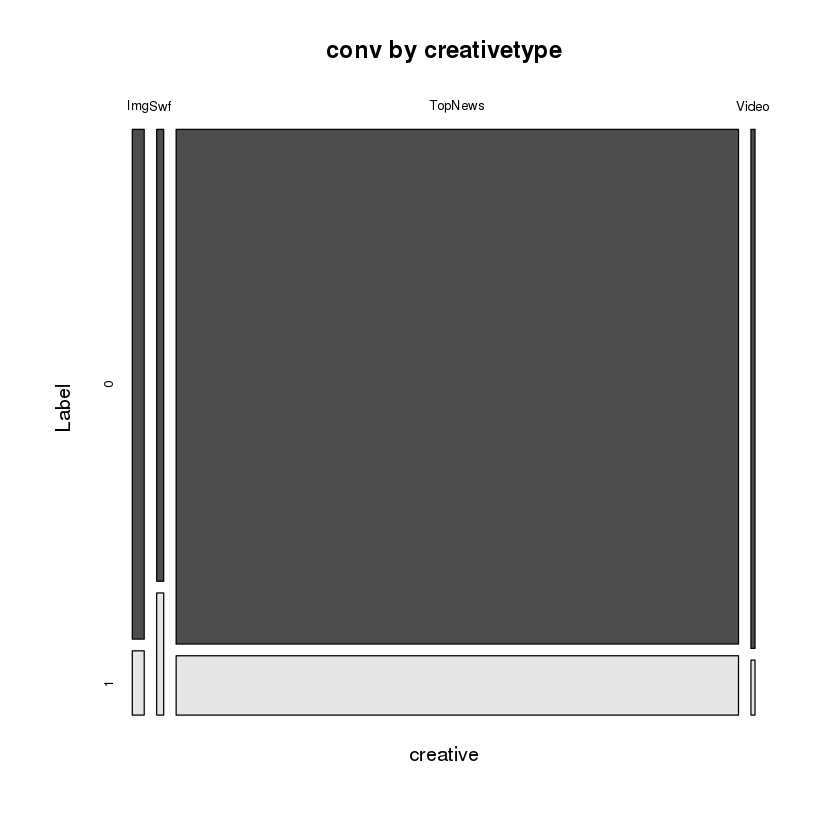

In [94]:
mosaicplot(CreativeType ~ Label, 
          main="conv by creativetype", shade=F, 
          color=TRUE, xlab="creative", ylab="Label")

# Corrgram

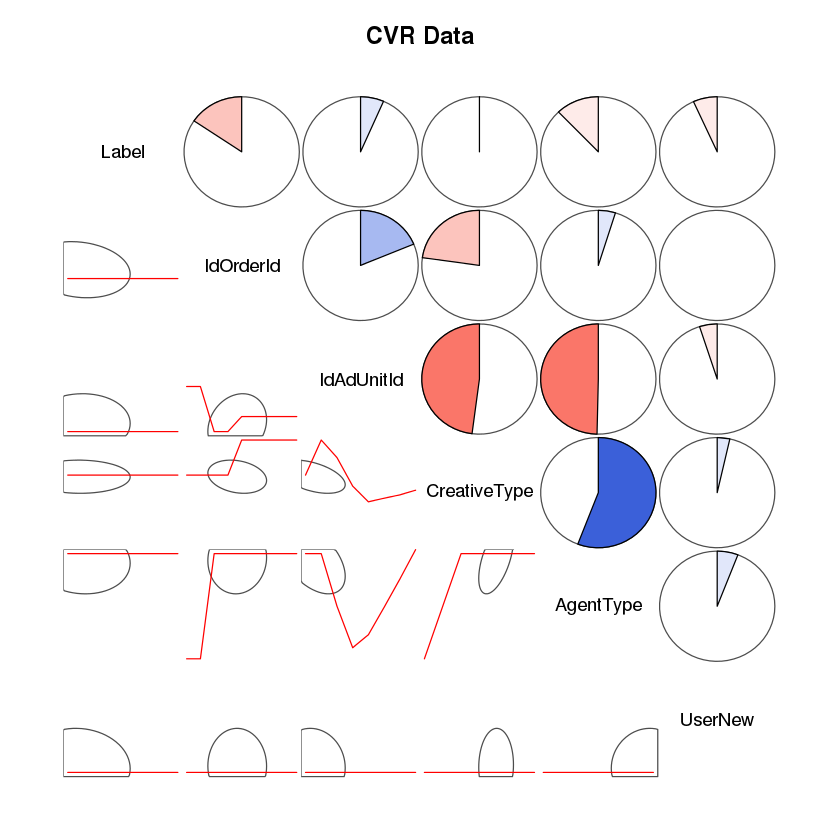

In [132]:
corrgram.data <- subset(cvr.data, select=c(
    "IdOrderId",
    "IdAdUnitId",
    "CreativeType",
    "AgentType",
    "UserNew",
    "Label"))

corrgram.data <- as.matrix(corrgram.data)
corrgram.data <- as.data.frame(corrgram.data, stringsAsFactors=T)
corrgram.data$IdOrderId <- as.numeric(corrgram.data$IdOrderId)
corrgram.data$IdAdUnitId <- as.numeric(corrgram.data$IdAdUnitId)
corrgram.data$CreativeType <- as.numeric(corrgram.data$CreativeType)
corrgram.data$Label <- as.numeric(corrgram.data$Label)
corrgram.data$AgentType <- as.numeric(corrgram.data$AgentType)
corrgram.data$UserNew <- as.numeric(corrgram.data$UserNew)

corrgram.vars <- c("Label",
                   "IdOrderId",
                   "IdAdUnitId",
                   "CreativeType",
                   "AgentType",
                   "UserNew")
corrgram(corrgram.data[,corrgram.vars], order=FALSE, 
         lower.panel=panel.ellipse, upper.panel=panel.pie, 
         text.panel=panel.txt, main="CVR corrgram")


# Hexbin

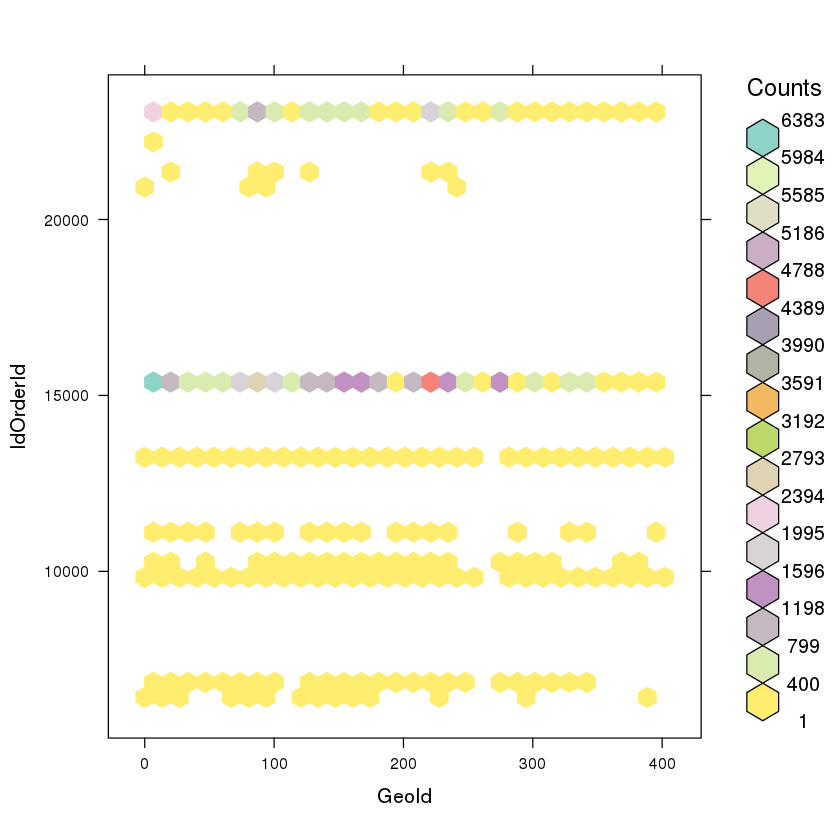

In [140]:
rf <- colorRampPalette(rev(brewer.pal(12,'Set3')))
hexbinplot(IdOrderId ~ GeoId, colramp=rf)

# boxplot 

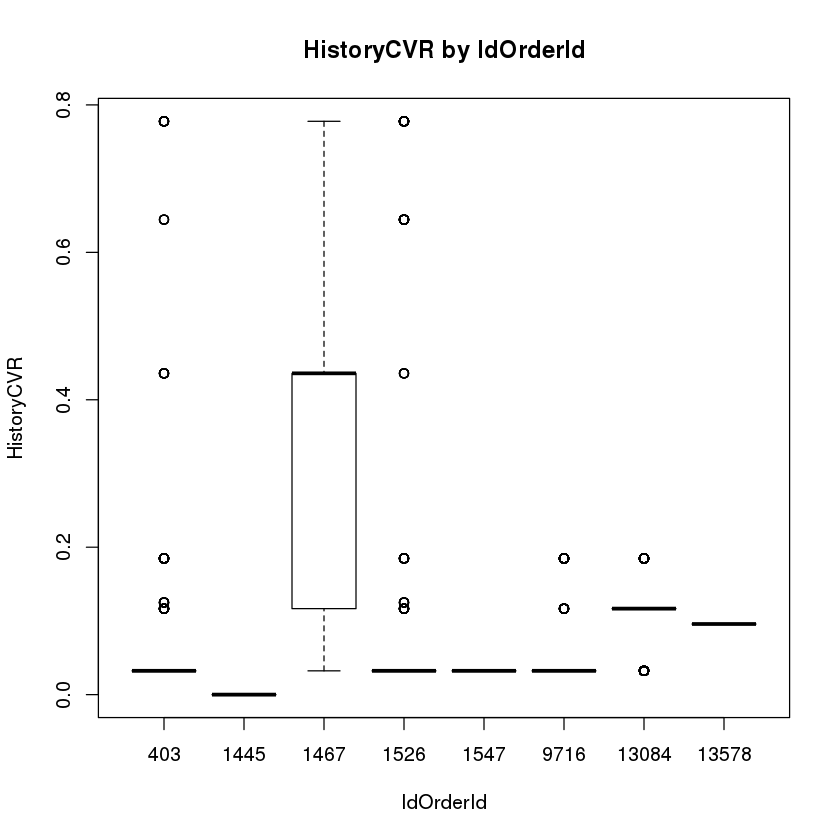

In [220]:
boxplot(as.numeric(HistoryCVR) ~ IdOrderId, main="HistoryCVR by IdOrderId", xlab="IdOrderId", ylab="HistoryCVR")


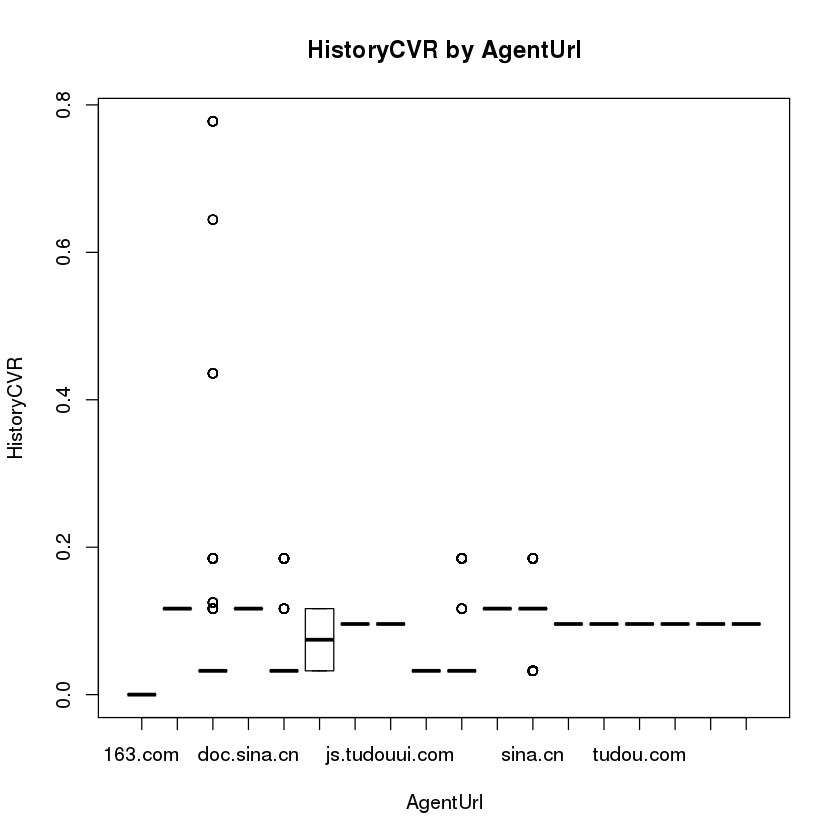

In [223]:
boxplot(as.numeric(HistoryCVR) ~ AgentUrl, main="HistoryCVR by AgentUrl", xlab="AgentUrl", ylab="HistoryCVR")


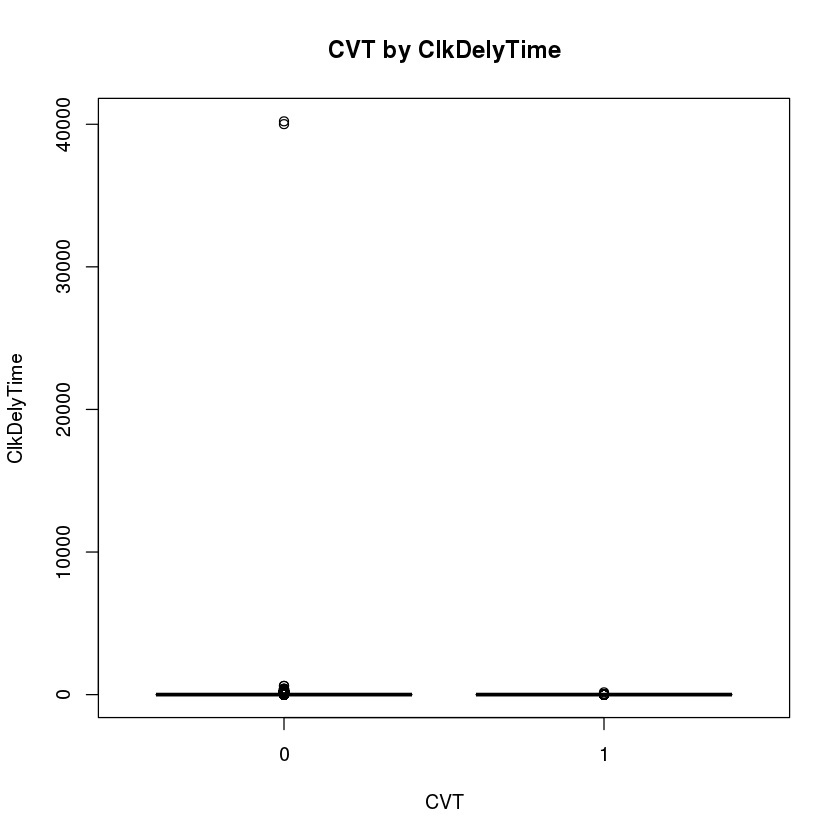

In [128]:
boxplot(as.numeric(ClkDelyTime) ~ CVT, main="CVT by ClkDelyTime", xlab="CVT", ylab="ClkDelyTime")


# pairs 

In [217]:
pairs.data <- subset(cvr.data, select=c(
    'HistoryCVR',
    'Hour',
    'ClkDelyTime',
    'AdUnitWidth',
    'AdUnitHeight'))
pairs.data$HistoryCVR <- as.numeric(pairs.data$HistoryCVR)
pairs.data$Hour <- as.numeric(pairs.data$Hour)
pairs.data$ClkDelyTime <- as.numeric(pairs.data$ClkDelyTime)
pairs.data$AdUnitWidth <- as.numeric(pairs.data$AdUnitWidth)
pairs.data$AdUnitHeight <- as.numeric(pairs.data$AdUnitHeight)

class(pairs.data[1,2])
#pairs.data <- data.frame(c(1,2,3), c(5,2,3), c(2,3,5))

#help(pairs)

[1] "numeric"

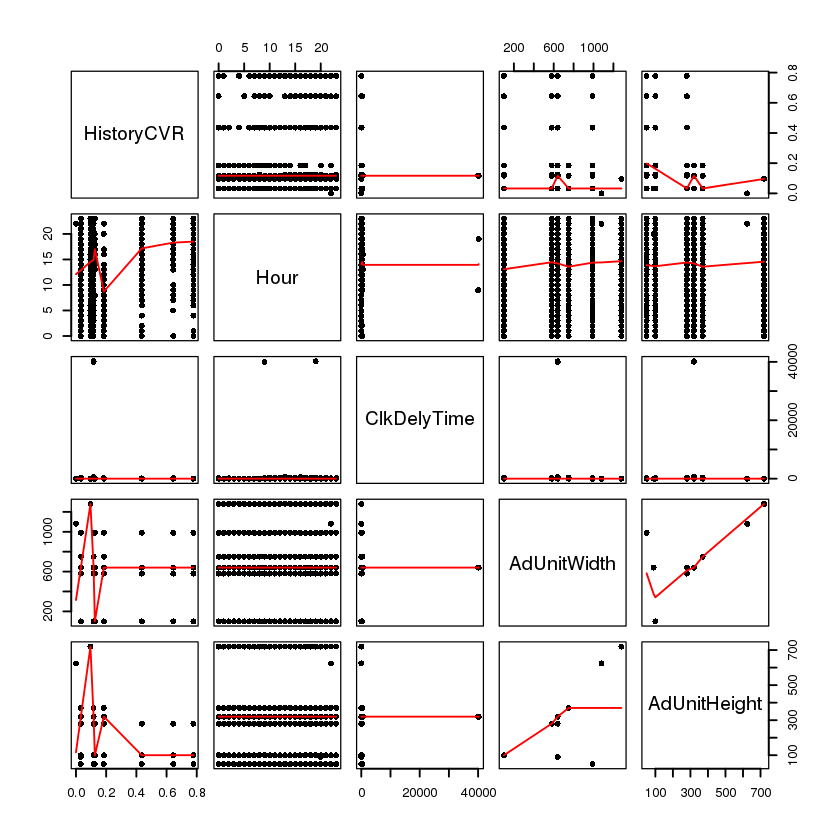

In [237]:
pairs(pairs.data, panel=panel.smooth, lwd=1.5, pch=16)